# Skin cancer prediction

## Information

This Google Colab notebook might be used as a test of the best model of our CI project.
More information along with an android app (apk) can be obtained:

https://skin-moles.web.app/

This can be used freely for any purpose.

## Prediction

In [1]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib
%pip install scikit-image

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Setup Input Pipeline

Download

*   Scratch Model.
*   Test images.



In [3]:
! wget https://github.com/blobquiet/skin-moles-site/raw/main/model_all.h5
! wget https://github.com/blobquiet/skin-moles-site/raw/main/data_test.zip
! unzip data_test.zip >/dev/null

--2021-01-12 20:08:17--  https://github.com/blobquiet/skin-moles-site/raw/main/model_all.h5
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/blobquiet/skin-moles-site/main/model_all.h5 [following]
--2021-01-12 20:08:17--  https://raw.githubusercontent.com/blobquiet/skin-moles-site/main/model_all.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33738480 (32M) [application/octet-stream]
Saving to: ‘model_all.h5’

model_all.h5        100%[===================>]  32.17M  84.6MB/s    in 0.4s    

2021-01-12 20:08:18 (84.6 MB/s) - ‘model_all.h5’ saved [33738480/33738480]

--2021-01-12 20:08:18--  https

### Load the images

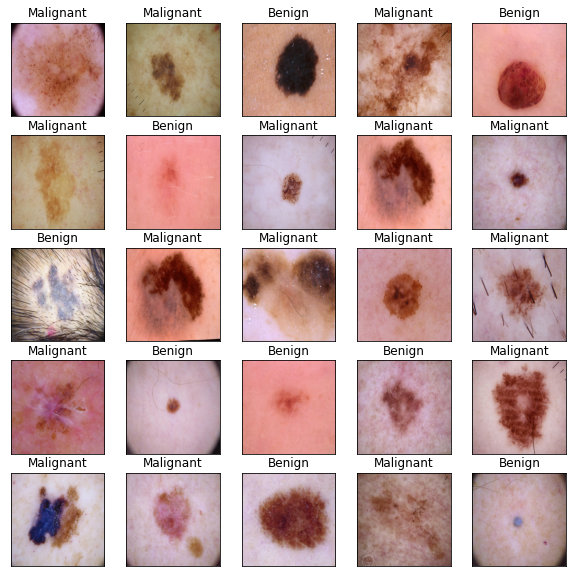

In [4]:
import os
from PIL import Image
import numpy as np
from skimage.transform import resize
import time
ti = time.time()

folder_benign_test = './data_test/benign'
folder_malignant_test = './data_test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

# Merge data 
X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

# get val data
X_val = X_test[:100]

# convert data type and normalize values
X_test = X_test.astype('float32')
X_test /= 255

# 5x5 visualization 
class_names = ['Benign', 'Malignant']
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.title(class_names[y_test[i].astype(int)])
plt.show()

### Load the pre-trained model

In [5]:
model = tf.keras.models.load_model('model_all.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

### Prediction of the model

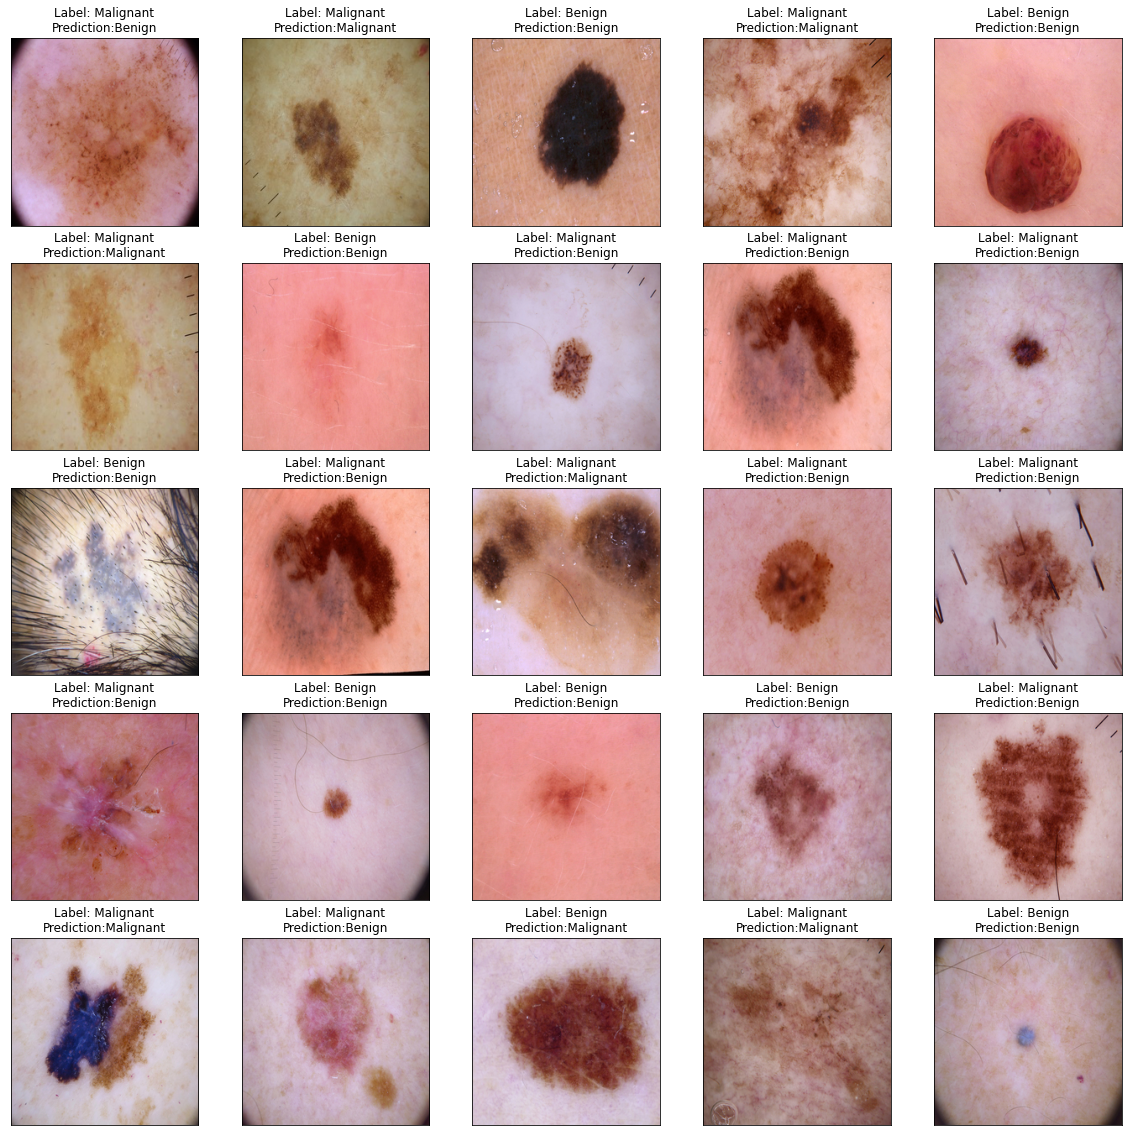

In [6]:
# 5x5 visualization 
class_names = ['Benign', 'Malignant']
plt.figure(figsize=(20,20))

pred = (model.predict(X_val) > 0.5).astype("int32")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i], cmap=plt.cm.binary)
    img = resize(X_val[i],(1,224,224,3))
    if  pred[i] == 1:
      prediction = class_names[1]
    elif pred[i] == 0:
      prediction = class_names[0]
    plt.title("Label: "+class_names[y_test[i].astype(int)] + "\nPrediction:"+prediction)
plt.show()